### Author: Tanvi Bhagat

### Aim: 
- Determine the causes of active day
- Use multiple regression model to predict players' active day

### Importing Packages

In [129]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

### Acquiring Data and Performing Modifications

In [130]:
data_path="https://docs.google.com/spreadsheets/d/e/2PACX-1vSjFSi5pJ6EQEiR6C_CPUb0xYSwX3BscJ41XD3xAB94MnYp90ICOBtwG30xtFqjMtsvGjD1vfc4ijux/pub?gid=1104164681&single=true&output=csv"
baseball= pd.read_csv(data_path)

In [95]:
baseball.head(3)

,Salary,count_at_bats,count_hits,count_home_runs,count_runs,RBI,count_walks,years_experience,cumulative_at_bats,cumulative_hits,cumulative_home_runs,cumulative_runs,cumulative_RBI,cumulative_walks,League,Division,PutOuts,Assists,Errors,NewLeague
0,875000,457,101,14,42,63,22,17,6521,1767,281,1003,977,619,A,W,389,39,4,A
1,1300000,441,118,28,84,86,68,8,2723,750,126,433,420,309,A,E,190,2,2,A
2,940000,593,152,23,69,75,53,6,2765,686,133,369,384,321,A,W,315,10,6,A


In [96]:
baseball.tail(2)

,Salary,count_at_bats,count_hits,count_home_runs,count_runs,RBI,count_walks,years_experience,cumulative_at_bats,cumulative_hits,cumulative_home_runs,cumulative_runs,cumulative_RBI,cumulative_walks,League,Division,PutOuts,Assists,Errors,NewLeague
241,0,200,57,6,23,14,14,9,2516,684,46,371,230,195,N,W,69,1,1,N
242,0,346,98,5,31,53,30,16,5913,1615,235,784,901,560,A,E,0,0,0,A


In [97]:
list(baseball)

['Salary',
 'count_at_bats',
 'count_hits',
 'count_home_runs',
 'count_runs',
 'RBI',
 'count_walks',
 'years_experience',
 'cumulative_at_bats',
 'cumulative_hits',
 'cumulative_home_runs',
 'cumulative_runs',
 'cumulative_RBI',
 'cumulative_walks',
 'League',
 'Division',
 'PutOuts',
 'Assists',
 'Errors',
 'NewLeague']


### Data set interpretion
<ul>
<li> PLAYERID: Unique identifier of each player</li>
<li>INSTALLDATE: Player's CIV6 install date</li>
<li>ACTIVEDAYS: The number of unique days player played the game</li>
<li>LASTACTIVEDAY: Last active day of the player</li>
<li>LEADERMOSTSELECTED: Most selected leaders in the game</li>
<li>CIVILIZATIONMOSTSELECTED: Most selected civilization in the game</li>
<li>POLAND: Player's install date of this DLC</li>
<li>NUBIA: Player's install date of this DLC</li>
<li>KHMER_AND_INDONESIA: Player's install date of this DLC</li>
<li>GATHERING_STORM: Player's install date of this Expansion Pack</li>
<li>PERSIA_AND_MACEDON: Player's install date of this DLC</li>
<li>VIKINGS: Player's install date of this DLC</li>
<li>RISE_AND_FALL: Player's install date of this Expansion Pack</li>
<li>AUSTRALIA: Player's install date of this DLC</li>
    </ul>

In [98]:
Nunique = baseball.nunique()
Nunique = Nunique.sort_values()
Nunique

NewLeague                 2
Division                  2
League                    2
years_experience         21
Errors                   27
count_home_runs          35
count_walks              82
count_runs               87
RBI                      98
Salary                  115
cumulative_home_runs    128
count_hits              128
Assists                 130
PutOuts                 185
count_at_bats           195
cumulative_runs         202
cumulative_walks        203
cumulative_RBI          207
cumulative_hits         221
cumulative_at_bats      241
dtype: int64

In [99]:
baseball['Division'].unique()

array(['W', 'E'], dtype=object)

In [100]:
baseball['NewLeague'].unique()

array(['A', 'N'], dtype=object)

In [101]:
print(baseball.shape)
print(list(baseball.columns))

(243, 20)
['Salary', 'count_at_bats', 'count_hits', 'count_home_runs', 'count_runs', 'RBI', 'count_walks', 'years_experience', 'cumulative_at_bats', 'cumulative_hits', 'cumulative_home_runs', 'cumulative_runs', 'cumulative_RBI', 'cumulative_walks', 'League', 'Division', 'PutOuts', 'Assists', 'Errors', 'NewLeague']


### Describing Quantitative Variables

In [102]:
baseball.describe()

,Salary,count_at_bats,count_hits,count_home_runs,count_runs,RBI,count_walks,years_experience,cumulative_at_bats,cumulative_hits,cumulative_home_runs,cumulative_runs,cumulative_RBI,cumulative_walks,PutOuts,Assists,Errors
count,2.430000e+02,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,3.964856e+05,377.621399,99.975309,10.666667,50.123457,47.362140,38.115226,7.473251,2654.497942,717.703704,71.831276,362.061728,332.069959,263.711934,284.263374,102.781893,7.629630
std,4.205241e+05,151.221516,45.997478,8.449656,25.186109,25.642821,21.239171,5.018386,2344.518332,657.431235,88.616130,337.841166,333.997166,277.955388,275.126756,134.263086,6.244557
min,0.000000e+00,16.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000e+04,255.500000,64.000000,4.000000,31.000000,29.000000,22.000000,4.000000,826.500000,209.500000,14.000000,100.500000,91.500000,66.500000,113.500000,6.500000,3.000000
50%,2.500000e+05,360.000000,95.000000,8.000000,48.000000,44.000000,34.000000,6.000000,1931.000000,510.000000,39.000000,258.000000,230.000000,174.000000,211.000000,33.000000,6.000000
75%,6.665000e+05,511.000000,136.000000,16.000000,68.500000,63.500000,52.000000,11.000000,3890.500000,1037.500000,93.000000,523.500000,424.500000,329.500000,322.500000,151.500000,10.000000
max,1.975000e+06,687.000000,238.000000,40.000000,117.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000


#### Checking for null values

In [103]:
round(100*(baseball.isnull().sum()/len(baseball.index)), 2)

Salary                  0.0
count_at_bats           0.0
count_hits              0.0
count_home_runs         0.0
count_runs              0.0
RBI                     0.0
count_walks             0.0
years_experience        0.0
cumulative_at_bats      0.0
cumulative_hits         0.0
cumulative_home_runs    0.0
cumulative_runs         0.0
cumulative_RBI          0.0
cumulative_walks        0.0
League                  0.0
Division                0.0
PutOuts                 0.0
Assists                 0.0
Errors                  0.0
NewLeague               0.0
dtype: float64

In [104]:
baseball= baseball[~(baseball==0).any(axis=1)]
baseball.shape

(166, 20)

In [105]:
baseball.tail(2)

,Salary,count_at_bats,count_hits,count_home_runs,count_runs,RBI,count_walks,years_experience,cumulative_at_bats,cumulative_hits,cumulative_home_runs,cumulative_runs,cumulative_RBI,cumulative_walks,League,Division,PutOuts,Assists,Errors,NewLeague
182,700000,283,77,14,45,47,26,16,6840,1910,259,915,1067,546,A,W,144,6,5,A
183,1350000,627,177,25,98,81,70,6,3210,927,133,529,472,313,A,E,240,482,13,A


### Encoding the three columns: League, Division, and NewLeague

In [106]:

encode= LabelEncoder()
baseball.loc[:, ['League', 'Division', 'NewLeague']]= \
baseball.loc[:, ['League', 'Division','NewLeague']].apply(encode.fit_transform)
baseball.head(5)

,Salary,count_at_bats,count_hits,count_home_runs,count_runs,RBI,count_walks,years_experience,cumulative_at_bats,cumulative_hits,cumulative_home_runs,cumulative_runs,cumulative_RBI,cumulative_walks,League,Division,PutOuts,Assists,Errors,NewLeague
0,875000,457,101,14,42,63,22,17,6521,1767,281,1003,977,619,0,1,389,39,4,0
1,1300000,441,118,28,84,86,68,8,2723,750,126,433,420,309,0,0,190,2,2,0
2,940000,593,152,23,69,75,53,6,2765,686,133,369,384,321,0,1,315,10,6,0
3,70000,312,68,2,32,22,24,1,312,68,2,32,22,24,0,0,86,150,15,0
4,815000,526,146,13,71,70,84,6,2648,715,77,352,342,289,1,1,303,9,9,1


### scaling the data between 0 to 1 

In [145]:
baseball_s = baseball.copy() 
baseball_s['Salary'] = np.log(baseball_s['Salary'])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [134]:
baseball_s.describe()

,Salary,count_at_bats,count_hits,count_home_runs,count_runs,RBI,count_walks,years_experience,cumulative_at_bats,cumulative_hits,cumulative_home_runs,cumulative_runs,cumulative_RBI,cumulative_walks,PutOuts,Assists,Errors
count,2.430000e+02,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,3.964856e+05,377.621399,99.975309,10.666667,50.123457,47.362140,38.115226,7.473251,2654.497942,717.703704,71.831276,362.061728,332.069959,263.711934,284.263374,102.781893,7.629630
std,4.205241e+05,151.221516,45.997478,8.449656,25.186109,25.642821,21.239171,5.018386,2344.518332,657.431235,88.616130,337.841166,333.997166,277.955388,275.126756,134.263086,6.244557
min,0.000000e+00,16.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000e+04,255.500000,64.000000,4.000000,31.000000,29.000000,22.000000,4.000000,826.500000,209.500000,14.000000,100.500000,91.500000,66.500000,113.500000,6.500000,3.000000
50%,2.500000e+05,360.000000,95.000000,8.000000,48.000000,44.000000,34.000000,6.000000,1931.000000,510.000000,39.000000,258.000000,230.000000,174.000000,211.000000,33.000000,6.000000
75%,6.665000e+05,511.000000,136.000000,16.000000,68.500000,63.500000,52.000000,11.000000,3890.500000,1037.500000,93.000000,523.500000,424.500000,329.500000,322.500000,151.500000,10.000000
max,1.975000e+06,687.000000,238.000000,40.000000,117.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000


## Lasso

In [109]:
X = np.array(baseball_s.loc[:, baseball_s.columns != 'Salary'])
y = np.array(baseball_s.loc[:, baseball_s.columns == 'Salary'])


In [110]:
train_data_X,test_data_X,train_data_y,test_data_y=train_test_split(X,y, test_size=0.3, random_state=31)

In [111]:
lasso = Lasso()
lasso.fit(train_data_X,train_data_y)
train_score=lasso.score(train_data_X,train_data_y)
test_score=lasso.score(test_data_X,test_data_y)
coeff_used = np.sum(lasso.coef_!=0)

print("training score:", train_score) 
print("test score:", test_score)
print("number of features used: ", coeff_used)

training score: 0.5756286643764177
test score: 0.47816170441556083
number of features used:  8


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03438720702416731, tolerance: 0.009786094237822835
  positive)


In [112]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(train_data_X,train_data_y)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [113]:
train_score001=lasso001.score(train_data_X,train_data_y)
test_score001=lasso001.score(test_data_X,test_data_y)
coeff_used001 = np.sum(lasso001.coef_!=0)

print("training score for alpha=0.01:", train_score001) 
print("test score for alpha =0.01: ", test_score001)
print("number of features used: for alpha =0.01:", coeff_used001)

training score for alpha=0.01: 0.6294836860369226
test score for alpha =0.01:  0.5309188029215687
number of features used: for alpha =0.01: 19


In [114]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(train_data_X,train_data_y)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [115]:
train_score00001=lasso00001.score(train_data_X,train_data_y)
test_score00001=lasso00001.score(test_data_X,test_data_y)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

print("training score for alpha=0.0001:", train_score00001) 
print("test score for alpha =0.0001: ", test_score00001)
print("number of features used: for alpha =0.0001:", coeff_used00001)

training score for alpha=0.0001: 0.6388208818972383
test score for alpha =0.0001:  0.5133986062854887
number of features used: for alpha =0.0001: 19


In [116]:
lr = LinearRegression()
lr.fit(train_data_X,train_data_y)
lr_train_score=lr.score(train_data_X,train_data_y)
lr_test_score=lr.score(test_data_X,test_data_y)

y_pred=lr.predict(test_data_X)
print("LR training score:", lr_train_score)
print("LR test score: ", lr_test_score)



LR training score: 0.6388218154601881
LR test score:  0.5130180433454566


Text(0.5, 1.0, 'Scatter plot for lasso coefficient index vs magnitude')

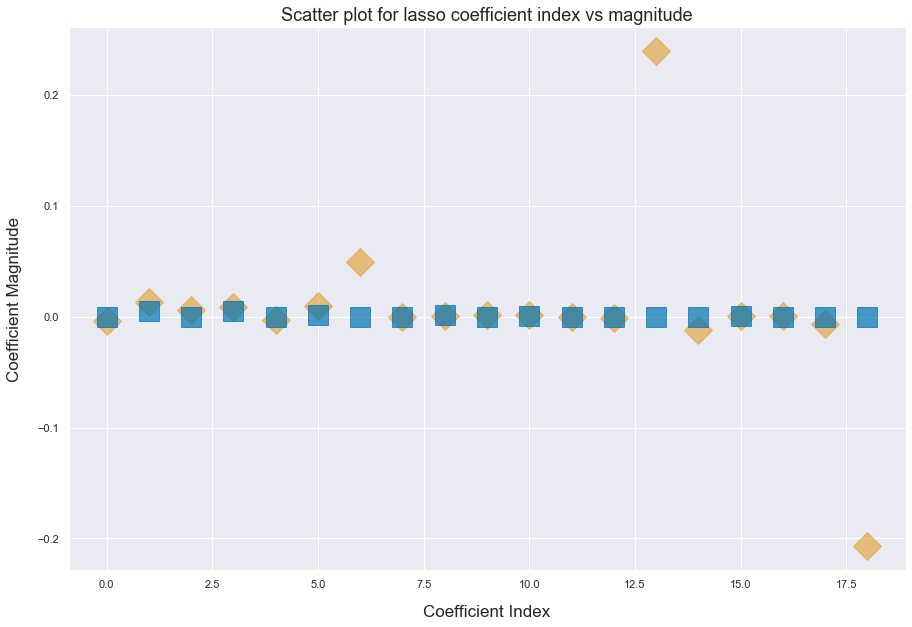

In [117]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
sns.set(style='whitegrid')
sns.set(palette='colorblind')

plt.xlabel("Coefficient Index", labelpad = 15, fontsize=17)
plt.ylabel("Coefficient Magnitude", labelpad = 15, fontsize=17);

plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='s',markersize=20, label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='D',markersize=20, label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

#sns.scatterplot(x = 'count_at_bats', y = 'count_hits', data = df , s=60, color="mediumvioletred")
plt.title("Scatter plot for lasso coefficient index vs magnitude", fontsize=18)



In [118]:
#Print the intercept
print('Intercept:', float(lr.intercept_))

Intercept: 11.33870759456007


In [119]:
print((pd.DataFrame(y_pred, columns={'y_prediction'}).head(5)))
print()

   y_prediction
0     13.165151
1     13.688147
2     12.641639
3     13.724896
4     12.453852



### Performance Metric: Mean Squared Error

In [120]:
print("Mean Squared Error (MSE) = %.2f" % mean_squared_error(test_data_y, y_pred))

Mean Squared Error (MSE) = 0.35


### Performance Metric: Root Mean Squared Error

In [121]:
print(" Root Mean Squared Error (RMSE):%.2f" % np.sqrt(mean_squared_error(test_data_y, y_pred)))

 Root Mean Squared Error (RMSE):0.59


### Explained variance score:

In [122]:

print('Variance Score (R-Square) = %.2f' % r2_score(test_data_y, y_pred))

Variance Score (R-Square) = 0.51


In [141]:
def lasso_regression(data_frame,salary_frame,alpha, i):
    #Fit the model
    lassoreg = Lasso(alpha=alpha, normalize=True,max_iter=1e6)
    lassoreg.fit(data_frame,salary_frame['Salary'])
    y_pred = lassoreg.predict(data_frame)
    
    rss = sum((y_pred-salary_frame['Salary'])**2)
    aic = len(data_frame)*np.log(rss/len(data_frame)) + 2*(len(data_frame.columns)-1)

    ret = [rss]
    ret.extend([aic])
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    print(str(i) + "--> ", ret)
    return ret

In [142]:
alpha_lasso = [1e-15, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, .5e-1, 1, 5, 20]

# 3 + 19[columns of the data frame without 'Salary'] making it 22 dimensions that will be returned
col = ['rss','aic','intercept'] + ['coef_x_%d'%i for i in range(1,20)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]


# converting to a data frame with shape (116, 19)
data_frame  = pd.DataFrame(train_data_X)
data_frame.columns = ['count_at_bats', 'count_hits', 'count_home_runs',	'count_runs', 'RBI', 'count_walks', 'years_experience', 'cumulative_at_bats', 'cumulative_hits', 'cumulative_home_runs', 'cumulative_runs', 'cumulative_RBI', 'cumulative_walks', 'League', 'Division', 'PutOuts', 'Assists', 'Errors', 'NewLeague']
print("data_frame shape -> ", data_frame.shape)

# converting to a data frame with a single feature (116,1)
salary_frame = pd.DataFrame(train_data_y)
salary_frame.columns = ['Salary']
print("salary_frame shape ->", salary_frame.shape)

coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

for i in range(len(alpha_lasso)):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data_frame, salary_frame, alpha_lasso[i], i)
    

data_frame shape ->  (116, 19)
salary_frame shape -> (116, 1)
0-->  [35.34523750552365, -101.85747769695811, 11.338707594560205, -0.003651445936360816, 0.012972438513827424, 0.004096909451256762, 0.008095376267353694, -0.002118537161192756, 0.010355137002285056, 0.05481924386597293, -0.00017603566576580336, 0.0008717412172649134, 0.002256534247069712, 0.0012941211123152772, -0.0004340270479429457, -0.0015672691406428216, 0.6198502520803939, -0.033857831770453276, 0.0003528383904618364, 0.000558987953648817, -0.010100069770429827, -0.5850735847531088]
1-->  [35.345255610139354, -101.85741827919685, 11.338842355969462, -0.0036527140678167384, 0.012987735602383891, 0.004126191069959972, 0.00807779760894854, -0.0021326513353756614, 0.01036450889419517, 0.05472370365785005, -0.00017352261105405358, 0.0008568108138317127, 0.002228631320749279, 0.0013024272608141451, -0.000421045199595207, -0.001569847120110594, 0.6193946436080178, -0.03401537044464149, 0.0003527016428783715, 0.00055766425280

## Observation:
### For all the values of alpha, we perform linear regression and observe that as the value of alpha increases, more and more coefficients become zero.

### We know that in a high dimensional data set, not all features are important for predicting a value and some features might be co-related. But in case of lasso regression, it performs feature selection even for small values of aplpha and reduces the coefficients to absolute zero as opposed to ridge regression.
### Therefore, it can be observed that even for small values of alpha [starting from 1e-3], some features have their magnitude of coefficient reduced to zero.

### As aplha value increases to 20, we observe that all features have their coefficients reduced to zero.



### For example, we see that once we reach alpha value 1e-3, the lasso regressions selects only certain features such as `count_hits`, `count_runs`, `count_walks`, `cumulative_hits` and `PutOuts` that contribute towards a Player's Salary. Other features may either be tied to the existing features or are irrelevant when determining a Player's Salary based on the given data.